# Principal Component Analysis (PCA) - Dimensionality Reduction

**Principal Component Analysis (PCA)** is a statistical method used to reduce the dimensionality of a dataset while preserving as much of the variance (information) as possible. It achieves this by finding new axes (principal components) that are linear combinations of the original features and are ordered by the amount of variance they explain in the data.

### Key Steps in PCA:
- 1.Standardize the Data: Since PCA is sensitive to the scale of the data, the first step is usually to standardize the dataset (mean=0 and variance=1 for each feature).

- 2.Covariance Matrix Computation: Compute the covariance matrix to understand how the features vary with respect to each other.

- 3.Eigenvalues and Eigenvectors: Calculate the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors represent the directions of maximum variance, and the eigenvalues tell you how much variance is captured by each eigenvector.

- 4.Sort Eigenvectors: Sort the eigenvectors in decreasing order of their corresponding eigenvalues, and select the top ```k``` eigenvectors (where k is the number of dimensions you want to keep).

- 5.Project Data: Project the original data onto the selected eigenvectors, thus reducing the dimensionality.

In [1]:
import numpy as np
from sklearn.decomposition import PCA

# 1. Create a sample dataset
data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

# 2. Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 3. Create a PCA object with desired number of components
pca = PCA(n_components=2)  # Reduce to 2 dimensions

# 4. Fit the PCA model to the data
pca.fit(data_scaled)

# 5. Transform the data onto the principal components
data_pca = pca.transform(data_scaled)

print("Original data:")
print(data)
print("_______________________________________")

# 6. Access principal components (eigenvectors) and explained variance
print("Principal components:")
print(pca.components_)
print()
print("Explained variance:")
print(pca.explained_variance_ratio_)
print()

# 7. Print the transformed data
print("Transformed data:")
print(data_pca)

Original data:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
_______________________________________
Principal components:
[[-0.57735027 -0.57735027 -0.57735027]
 [-0.81649658  0.40824829  0.40824829]]

Explained variance:
[1.00000000e+00 1.11294118e-34]

Transformed data:
[[ 2.12132034e+00  4.46551999e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [-2.12132034e+00 -4.46551999e-16]]


- Principal Components: The two principal components are the directions of maximum variance.
- Explained Variance Ratio: The first component explains 99.03% of the variance, and the second explains 0.97%.
- Transformed Data: The new data in the reduced 2D space after PCA transformation.

---
Let's take a look into another example:

# Code to Perform PCA on Iris Dataset with Detailed Explanations

Original data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
_______________________________________
Principal components (eigenvectors):
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]

Explained variance ratio:
[0.72962445 0.22850762]



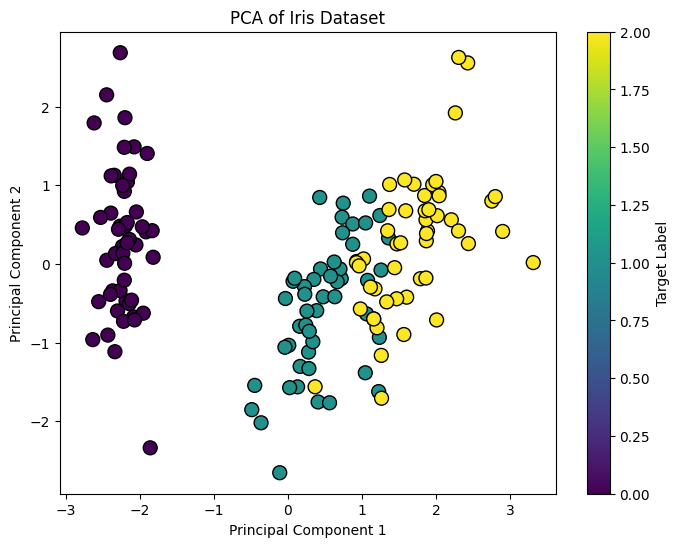

Transformed data:
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 1. Load the Iris dataset
# The Iris dataset is a famous dataset containing measurements of iris flowers.
data = load_iris()
X = data.data  # Features (sepal length, sepal width, petal length, petal width)
y = data.target  # Target labels (species)

# 2. Standardize the data (important for PCA)
# StandardScaler standardizes the data to have mean=0 and variance=1 for each feature.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Apply scaling to the feature matrix

# 3. Create a PCA object with the desired number of components
# PCA will reduce the data from 4 dimensions (features) to 2 dimensions.
pca = PCA(n_components=2)  # Create PCA object with 2 components for dimensionality reduction

# 4. Fit the PCA model to the standardized data
# This step calculates the principal components based on the covariance matrix of the data.
pca.fit(X_scaled)

# 5. Transform the data onto the principal components
# After fitting the model, we transform the data into the new PCA space (2D in this case).
X_pca = pca.transform(X_scaled)

print("Original data:")
print(X[:5])  # Print the first 5 rows of the original data
print("_______________________________________")

# 6. Access principal components (eigenvectors) and explained variance
print("Principal components (eigenvectors):")
print(pca.components_)  # The eigenvectors representing the directions of maximum variance
print()

print("Explained variance ratio:")
print(pca.explained_variance_ratio_)  # Proportion of variance explained by each component
print()

# 7. Plot the data in the new 2D PCA space
# We use a scatter plot to visualize the data after PCA transformation.
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.colorbar(label='Target Label')  # Add color bar to show species classes
plt.xlabel('Principal Component 1')  # Label for the x-axis
plt.ylabel('Principal Component 2')  # Label for the y-axis
plt.title('PCA of Iris Dataset')  # Title of the plot
plt.show()

# 8. Print the transformed data (in the new 2D space)
print("Transformed data:")
print(X_pca[:5])  # Print the first 5 rows of the transformed data in 2D space
